Seçilen Özellikler: Index(['Longitude', 'Latitude'], dtype='object')
Model Doğruluğu: 0.5689424364123159
              precision    recall  f1-score   support

           0       0.47      0.52      0.49       185
           1       0.61      0.67      0.64       358
           2       0.59      0.43      0.50       204

    accuracy                           0.57       747
   macro avg       0.56      0.54      0.54       747
weighted avg       0.57      0.57      0.57       747



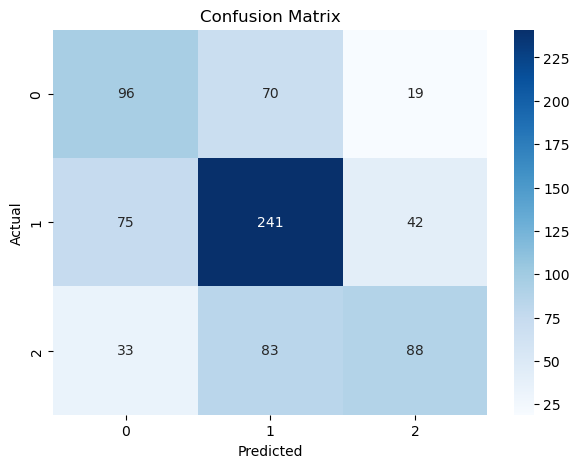

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
dFrame = pd.read_excel("Data_processed.xlsx")


nullValues = 0.000000
def cleanData(dataFrame):
    
    for index in dataFrame.columns:
        if nullValues in dataFrame[index].values:
            dataFrame[index] = dataFrame[index].mean()


        return dataFrame


def changeToNumeric(dataFrame):
    for col in dataFrame.columns:
        if dataFrame[col].dtype not in ['float64', 'int64']:
            dataFrame[col] = dataFrame[col].astype('category').cat.codes  # Kategorik verileri sayısallaştırma
    return dataFrame


def selectFeatures(dataFrame):
    X = dataFrame.drop('GrainYield', axis=1)
    y = dataFrame['GrainYield']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = DecisionTreeClassifier(random_state=42)
    
    selector = RFE(model, n_features_to_select=2)
    selector = selector.fit(X_train, y_train)
    
    selected_features = X.columns[selector.support_]
    print("Seçilen Özellikler:", selected_features)
    
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    model.fit(X_train_selected, y_train)
    
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Doğruluğu:", accuracy)
    
    print(classification_report(y_test, y_pred))
    
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

 


cleanedData = cleanData(dFrame)
dFrame = changeToNumeric(cleanedData)
selectFeatures(dFrame)


